<a href="https://colab.research.google.com/github/fernandodeeke/Bayesian-Statistics/blob/main/gluten_sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H2> </H2></center>
<center><H2> Probability and Statistics</H2></center>
<center><H4>Fernando Deeke Sasse<br></H4></center>
<center><H4>Departamento de Matemática - CCT -  UDESC</H4></center>
<center><H2>Adding results from different distributions</H2></center>

This section is based in chapter 6 of the textbook: A. Downey, Think Bayes 2nd ed., https://greenteapress.com/wp/think-bayes/

Problem: 35 patients were examined in a double blinded test where they should distinguish flour with and without gluten, based on symptoms.

Results:
* 12 correctly identified  the gluten flour.
* 17 wrongly identified  the gluten flour.
* 6 were unable to distiguish.

The paper's author claimed that "Double blind gluten challenge induces symptom recurrence in just one third of patients".

### Forward Analysis

Suppose we know 10 out 35 patiens are sensitive to gluten (25 are not).

Suppose also that people who are gluten sentitive have a 95% chance of correctly identifying the gluten flour and people who are not sentive have 40% chance of indentifying correctly the gluten flour (and a 60% chance of either choosing the wrong flour or failing to distinguish)


In [ ]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.5-py3-none-any.whl size=12469 sha256=c4827963e3882c2c9f1ccd06e2e97f45082bacd10f05f5d61bbf888beafec4ee
  Stored in directory: /root/.cache/pip/wheels/0d/d0/ae/1ad4c7593703e55b2321b23b49d3b0d55261b59d7036d7045b
Successfully built empiricaldist


In [ ]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

Downloaded utils.py


In [ ]:
n = 35
num_sensitive = 10
num_not_sensitive = n - num_sensitive

In [ ]:
from utils import set_pyplot_params
set_pyplot_params()

In [ ]:
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [ ]:
from utils import decorate
from utils import make_binomial

In [ ]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_not_sensitive = make_binomial(num_not_sensitive, 0.4)

Let us add the correct identifications of gluten for the two groups:

In [ ]:
dist_total = Pmf.add_dist(dist_sensitive, dist_not_sensitive)

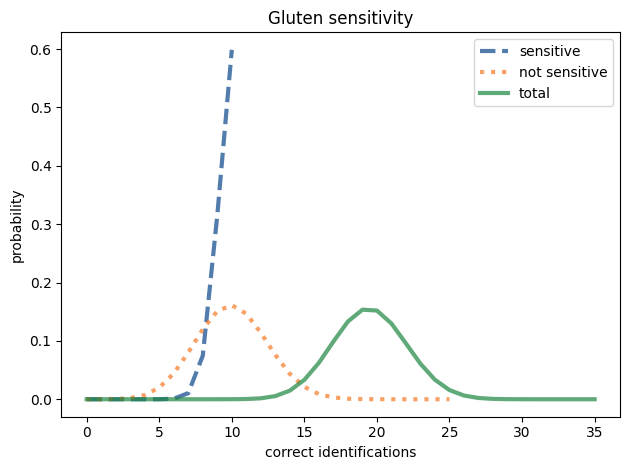

In [ ]:
dist_sensitive.plot(label = 'sensitive', ls = "--")
dist_not_sensitive.plot(label = 'not sensitive', ls = ":")
dist_total.plot(label = 'total')

decorate(xlabel = 'correct identifications', ylabel = 'probability',
         title ='Gluten sensitivity')

This is called the forward problem: given the number of sensitive people we can compute the distribution.

### Problems

**1.** Based on the textbook, solve the inverse problem: given the data, compute the posterior distribution of sensitive people.

**2.** Solve problems 6-4 , 6-5, 6-6, 6-7 and 6-8 of the textbook.